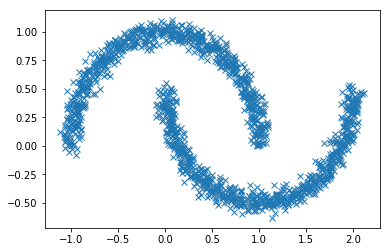

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X= noisy_moons[0]
y= noisy_moons[1]

plt.plot(X[:,0], X[:,1], 'x')
plt.show()

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [57]:
def LogisticRegression(Z, labels, alpha = 0.1, niter = 100, lamda = 0.1):
    theta = np.random.random((Z.shape[1] + 1,1))
    m = len(labels)
    
    Z = np.hstack((np.ones((Z.shape[0],1)) , Z))
    
    for i in range(niter):
    
        h = sigmoid(np.dot(theta.T, Z.T))
        
        J1 = np.sum(np.log(h[labels == 1]))
        
        J2 = np.sum(np.log(1 - h[labels == 0]))
        
        J = 1/(2*m)*(J1 + J2)
        
        delta = (h - labels)

        DJ = 1/(m)*delta @ Z

        theta = (1- alpha*lamda)*theta - alpha * DJ.T
        
    return theta

In [58]:
Xnorm = (X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min(X, axis = 0))
Xnorm

array([[0.04578672, 0.61197165],
       [0.34731691, 0.90172812],
       [0.86458813, 0.17643942],
       ...,
       [0.61364899, 0.59288828],
       [0.51434896, 0.85402227],
       [0.85107084, 0.20800517]])

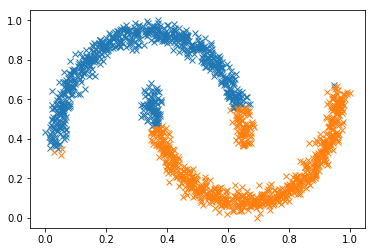

In [68]:
otheta = LogisticRegression(Xnorm, y[None, :], alpha = 0.01, niter= 100)

Xnorm_1 = np.hstack((np.ones((Xnorm.shape[0],1)) , Xnorm))
h = sigmoid(np.dot(otheta.T, Xnorm_1.T))

pred = h >= 0.5
pred = pred.astype(int)

for j in range(2):
    ind = pred == j
    plt.plot(Xnorm[ind[0],0], Xnorm[ind[0],1], 'x')
plt.show()